<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1.1
# *Evaluating Classification Models*

In this lab you will be practicing evaluating classification models (Logistic Regression in particular) on a "Breast Cancer" data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

%matplotlib inline

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter) 
    b) texture (standard deviation of gray-scale values) 
    c) perimeter 
    d) area 
    e) smoothness (local variation in radius lengths) 
    f) compactness (perimeter^2 / area - 1.0) 
    g) concavity (severity of concave portions of the contour) 
    h) concave points (number of concave portions of the contour) 
    i) symmetry 
    j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
breast_cancer_csv = 'breast-cancer-wisconsin-data.csv'

### 2. EDA 

Explore dataset. Check for nulls. Make the target column binary.

In [4]:
df = pd.read_csv(breast_cancer_csv)

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
df = df.drop(columns ='Unnamed: 32')

In [7]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# for col in df:
#     plt.figure(figsize = (12,6))
#     sns.histplot(x = col, hue = 'diagnosis',data = df)
#     plt.show()

### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

In [9]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


In [10]:
X = df.drop(columns = ['diagnosis','id'])

In [11]:
y = df['diagnosis']

y = pd.get_dummies(y, drop_first = True)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

reg = LogisticRegression(max_iter = 10000)
reg.fit(X_train,y_train)

y_pred = reg.predict_proba(X_test)[:,1]

print("The accuracy score is {}".format(reg.score(X_test,y_test)))


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


The accuracy score is 0.9649122807017544


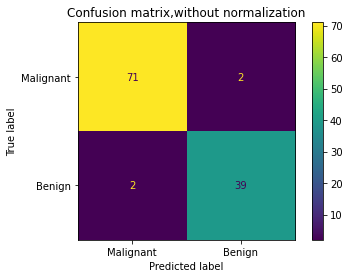

In [13]:
class_names = ['Malignant','Benign']
plot_confusion_matrix(reg,X_test,y_test, normalize= None,display_labels = class_names)
plt.title('Confusion matrix,without normalization')
plt.show()

#### 3.2 Calculate the predicted labels and predicted probabilities on the test set.

In [14]:
# predict test class:
y_class = reg.predict(X_test)
# predicted test probability:
y_prob = reg.predict_proba(X_test)

#### 3.3 Create the confusion matrix for your classfier's performance on the test set.

Convert confusion_matrix to a dataframe. 

    index=['is_healthy', 'is_cancer']
    columns=['predicted_healthy','predicted_cancer']

In [15]:
# ANSWER

matrix = pd.DataFrame(confusion_matrix(y_test,y_pred.round()), index = ['is_cancer','is_healthy'], columns = ['predicted_cancer','predicted_healthy'])

matrix

,predicted_cancer,predicted_healthy
is_cancer,71,2
is_healthy,2,39


#### 3.4 Calculate Accuracy

**Classification Accuracy:** Overall, how often is the classifier correct?
    
    (TP + TN) / float(TP + TN + FP + FN)

In [16]:
# ANSWER
# use float to perform true division, not integer division
TP = matrix.iloc[0,0]
TN = matrix.iloc[1,1]
FP = matrix.iloc[0,1]
FN = matrix.iloc[1,0]

accuracy = (TP + TN) / float(TP + TN + FP + FN)

accuracy

0.9649122807017544

#### 3.5 Calculate Classification Error

**Classification Error:** Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

    (FP + FN) / float(TP + TN + FP + FN)

In [17]:
# ANSWER

misclassification = (FP + FN) / float(TP + TN + FP + FN)

misclassification

0.03508771929824561

#### 3.6 Calculate Sensitivity

**Sensitivity:** When the actual value is positive, how often is the prediction correct?

Something we want to maximize
How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"
- TP / all positive
    - all positive = TP + FN
    
    sensitivity = TP / float(FN + TP)

In [18]:
# ANSWER

sensitivity = TP / float(FN + TP)

sensitivity

0.9726027397260274

#### 3.7 Calculate Specificity

**Specificity:** When the actual value is negative, how often is the prediction correct?

- Something we want to maximize. How "specific" (or "selective") is the classifier in predicting positive instances?
- TN / all negative
    - all negative = TN + FP
    
    specificity = TN / (TN + FP)

In [19]:
# ANSWER

specificity = TN / (TN + FP)

specificity

0.9512195121951219

#### 3.8 Calculate False Positive Rate

**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

    false_positive_rate = FP / float(TN + FP)

In [20]:
# ANSWER

false_positive_rate = FP / float(TN + FP)

false_positive_rate

0.04878048780487805

#### 3.9 Calculate Precision

**Precision:** When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

    precision = TP / float(TP + FP)

In [21]:
# ANSWER

precision = TP / float(TP + FP)

precision

0.9726027397260274

#### 3.10 Create a predicted test probability dataframe with column name 'class_0_pp','class_1_pp'

In [22]:
# ANSWER
# Get the predicted probability vector and explicitly name the columns:) - raw probability of prediction
predictions = reg.predict_proba(X_test)

# table = pd.DataFrame(data = )

table = pd.DataFrame(data = predictions, columns = ['class_0_pp','class_1_pp'] )

table['class_0_pp'] = table['class_0_pp']*100
table['class_1_pp'] = table['class_1_pp']*100

table

,class_0_pp,class_1_pp
0,30.577090,69.422910
1,99.986500,0.013500
2,77.667073,22.332927
3,13.481620,86.518380
4,54.710074,45.289926
...,...,...
109,99.954705,0.045295
110,99.891442,0.108558
111,99.531534,0.468466
112,99.999457,0.000543


#### 3.11 The Receiver operating characteristic (ROC) curve

Plot the ROC curve for Class 1

In [23]:
from sklearn.metrics import roc_curve, auc

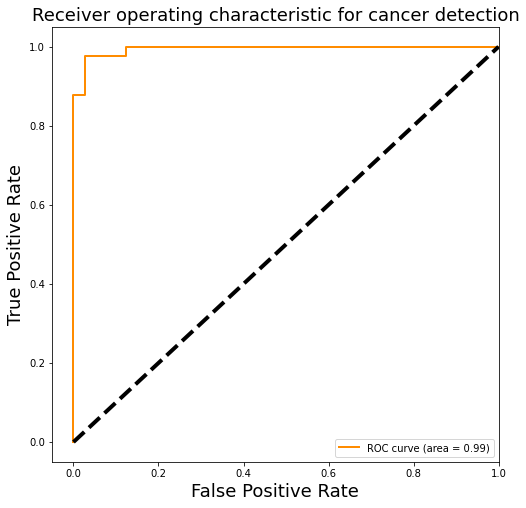

In [24]:
# For class 1, find the area under the curve
# Find fpr, tpr
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Find auc
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[8,8])

# Plot fpr, tpr
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



